In [319]:
import numpy as np
import matplotlib.pyplot as plt


def prey_predator_equations(p, q, alpha, beta, delta, gamma):
    dpdt = alpha * p - beta * p * q
    dqdt = delta * p * q - gamma * q
    return dpdt, dqdt



def euler_method(p0, q0, alpha, beta, delta, gamma, h, num_steps):
    p_values = [p0]
    q_values = [q0]

    for _ in range(num_steps):
        dpdt, dqdt = prey_predator_equations(p_values[-1], q_values[-1], alpha, beta, delta, gamma)
        p_new = p_values[-1] + h * dpdt
        q_new = q_values[-1] + h * dqdt
        p_values.append(p_new)
        q_values.append(q_new)

    return p_values, q_values





t0 = 0
p0 = 10
q0 = 10

alpha = 1.1
beta = 0.4
delta = 0.1
gamma = 0.4

h = 0.001
num_steps = 100000



p_values, q_values = euler_method(p0, q0, alpha, beta, delta, gamma, h, num_steps)




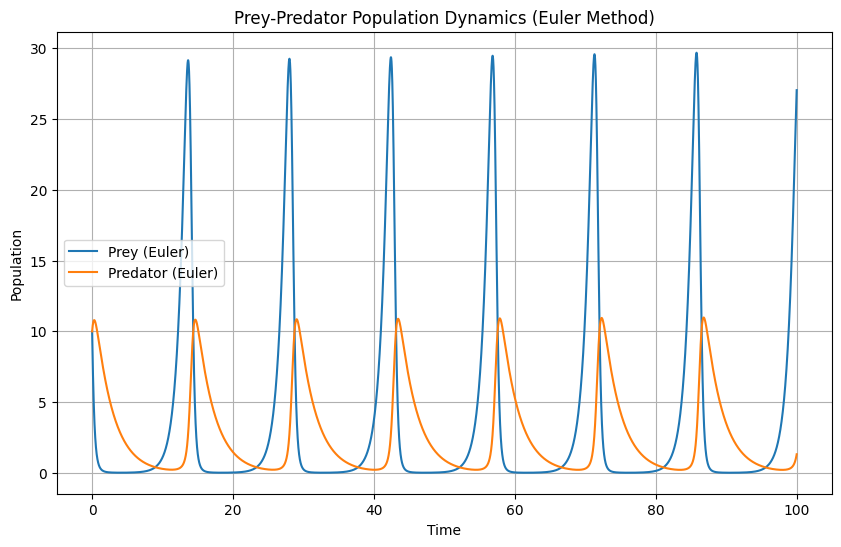

In [320]:
t_values = np.arange(0, (num_steps + 1) * h, h)
plt.figure(figsize=(10, 6))
plt.plot(t_values, p_values, label='Prey (Euler)')
plt.plot(t_values, q_values, label='Predator (Euler)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Prey-Predator Population Dynamics (Euler Method)')
plt.grid(True)
plt.show()

In [321]:
p_v = [p_values]
q_v = [q_values]
for _ in range(3):
    p0 = np.random.randint(5,50)
    q0 = np.random.randint(5,50)
    p_values, q_values = euler_method(p0, q0, alpha, beta, delta, gamma, h, num_steps)
    p_v.append(p_values)
    q_v.append(q_values)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


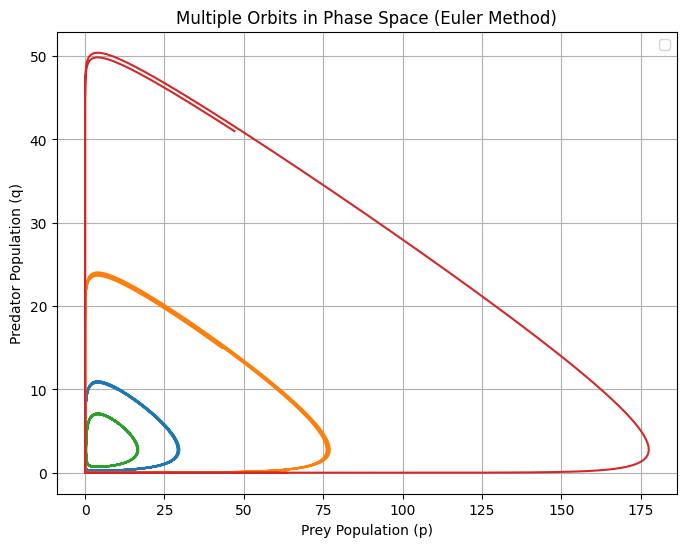

In [322]:
plt.figure(figsize=(8, 6))
for p_values, q_values in zip(p_v, q_v):
    plt.plot(p_values, q_values)

plt.xlabel('Prey Population (p)')
plt.ylabel('Predator Population (q)')
plt.title('Multiple Orbits in Phase Space (Euler Method)')
plt.legend()
plt.grid(True)
plt.show()

In [323]:
def runge_kutta_method(p0, q0, alpha, beta, delta, gamma, h, num_steps):
    p_values = [p0]
    q_values = [q0]

    for _ in range(num_steps):
        k1_p, k1_q = prey_predator_equations(p_values[-1], q_values[-1], alpha, beta, delta, gamma)
        k2_p, k2_q = prey_predator_equations(p_values[-1] + h/2 * k1_p, q_values[-1] + h/2 * k1_q, alpha, beta, delta, gamma)
        k3_p, k3_q = prey_predator_equations(p_values[-1] + h/2 * k2_p, q_values[-1] + h/2 * k2_q, alpha, beta, delta, gamma)
        k4_p, k4_q = prey_predator_equations(p_values[-1] + h * k3_p, q_values[-1] + h * k3_q, alpha, beta, delta, gamma)

        p_new = p_values[-1] + h/6 * (k1_p + 2 * k2_p + 2 * k3_p + k4_p)
        q_new = q_values[-1] + h/6 * (k1_q + 2 * k2_q + 2 * k3_q + k4_q)
        p_values.append(p_new)
        q_values.append(q_new)

    return p_values, q_values
p0 = 10
q0 = 10
p_values_rk, q_values_rk = runge_kutta_method(p0, q0, alpha, beta, delta, gamma, h, num_steps)

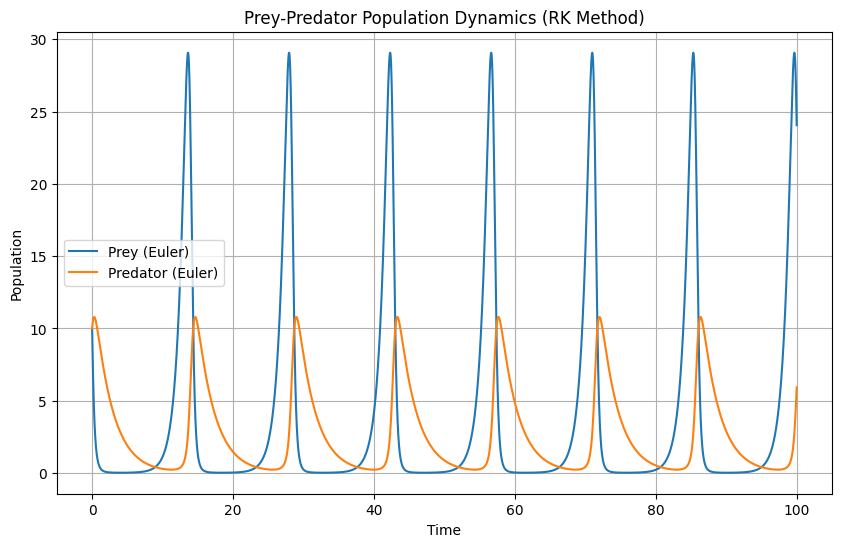

In [324]:
t_values = np.arange(0, (num_steps + 1) * h, h)
plt.figure(figsize=(10, 6))
plt.plot(t_values, p_values_rk, label='Prey (Euler)')
plt.plot(t_values, q_values_rk, label='Predator (Euler)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Prey-Predator Population Dynamics (RK Method)')
plt.grid(True)
plt.show()

In [325]:
p_v_rk = [p_values_rk]
q_v_rk = [q_values_rk]
for i in range(3):
    p0 = np.random.randint(5,50)
    q0 = np.random.randint(5,50)
    p_values_rk, q_values_rk = euler_method(p0, q0, alpha, beta, delta, gamma, h, num_steps)
    p_v_rk.append(p_values_rk)
    q_v_rk.append(q_values_rk)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


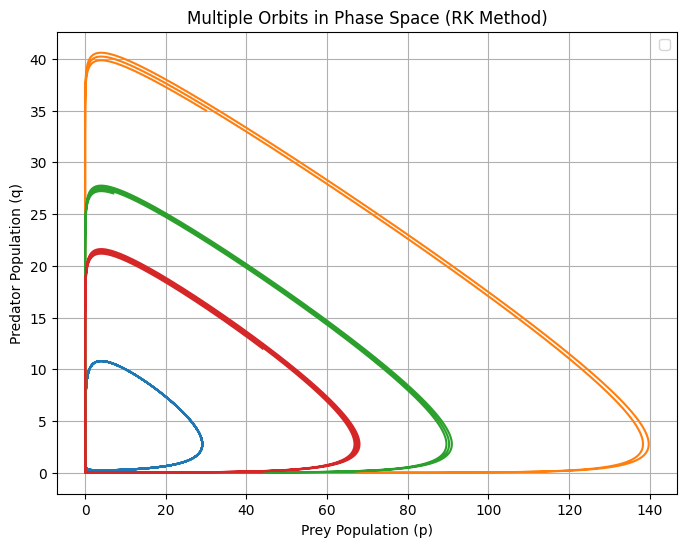

In [326]:
plt.figure(figsize=(8, 6))
for p_values_rk, q_values_rk in zip(p_v_rk, q_v_rk):
    plt.plot(p_values_rk, q_values_rk)

plt.xlabel('Prey Population (p)')
plt.ylabel('Predator Population (q)')
plt.title('Multiple Orbits in Phase Space (RK Method)')
plt.legend()
plt.grid(True)
plt.show()